# Guide for the HiggsToBB dataset (Part 1)

This notebook is a guide for using the HiggsToBBNTuple_HiggsToBB_QCD_RunII_13TeV_MC dataset. 

In Part 1, we focus on feature visualization, including jet features, track features. We also provide correlation analysis on selected features for Machine Learning tasks.

# Dataset

Cite as: Duarte, Javier; (2019). Sample with jet, track and secondary vertex properties for Hbb tagging ML studies HiggsToBBNTuple_HiggsToBB_QCD_RunII_13TeV_MC. CERN Open Data Portal. DOI:[10.7483/OPENDATA.CMS.JGJX.MS7Q](http://doi.org/10.7483/OPENDATA.CMS.JGJX.MS7Q)

## Description: 

The dataset has been produced for developing machine-learning algorithms to differentiate jets originating from a Higgs boson decaying to a bottom quark-antiquark pair (Hbb) from quark or gluon jets originating from quantum chromodynamic (QCD) multijet production.

The reconstructed jets are clustered using the anti-kT algorithm with R=0.8 from particle flow (PF) candidates (AK8 jets). The standard L1+L2+L3+residual jet energy corrections are applied to the jets and pileup contamination is mitigated using the charged hadron subtraction (CHS) algorithm. Features of the AK8 jets with transverse momentum pT > 200 GeV and pseudorapidity |η| < 2.4 are provided. Selected features of inclusive (both charged and neutral) PF candidates with pT > 0.95 GeV associated to the AK8 jet are provided. Additional features of charged PF candidates (formed primarily by a charged particle track) with pT > 0.95 GeV associated to the AK8 jet are also provided. Finally, additional features of reconstructed secondary vertices (SVs) associated to the AK8 jet (within ∆R < 0.8) are also provided.

## File Information

There are two lists of files, one in ROOT format and another in H5. For H5 files, only information for up to 100 particle candidates, up to 60 charged particles or tracks, and up to 5 secondary vertices are stored in zero-padded arrays. 

List of H5 files: 
- Test: http://opendata.cern.ch/record/12102/files/HiggsToBBNTuple_HiggsToBB_QCD_RunII_13TeV_MC_test_h5_file_index.txt
- Train: http://opendata.cern.ch/record/12102/files/HiggsToBBNTuple_HiggsToBB_QCD_RunII_13TeV_MC_train_h5_file_index.txt

List of ROOT files:
- Test: http://opendata.cern.ch/record/12102/files/HiggsToBBNTuple_HiggsToBB_QCD_RunII_13TeV_MC_test_root_file_index.txt
- Train: http://opendata.cern.ch/record/12102/files/HiggsToBBNTuple_HiggsToBB_QCD_RunII_13TeV_MC_train_root_file_index.txt

The size of each H5 file is 1.4 GB, and the size of each ROOT file is 1.1 GB. 

This notebook help you walk through the **H5** format dataset, and it's derived from this list of notebooks that are developed for the **ROOT** format: https://jmduarte.github.io/capstone-particle-physics-domain/weeks/02-dataset.html

In [1]:
import h5py
import tables
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pandas as pd
import seaborn as sns

filename = 'ntuple_merged_11.h5' # train file
if not os.path.isfile(filename): 
    !wget http://opendata.cern.ch/eos/opendata/cms/datascience/HiggsToBBNtupleProducerTool/HiggsToBBNTuple_HiggsToBB_QCD_RunII_13TeV_MC/train/ntuple_merged_11.h5 .

### Read the file

print the list of variables in the hdf5 file 


In [2]:
f = h5py.File(filename,'r')

In [3]:
# create a variable info dataframe 
df_list = [] # list of variable information
for key in f.keys():
    arr = f[key][:]
    minn,maxx = np.min(arr),np.max(arr)
    df_list.append([key, arr.dtype, arr.shape,  minn, maxx])

info_df = pd.DataFrame(df_list, columns=['keys','dtype', 'dimension', 'min', 'max'])

In [4]:
print("Dataset information: \n %s variables \n %s samples" %(len(f.keys()), len(arr)))
print(info_df.to_string())

Dataset information: 
 172 variables 
 200000 samples
                              keys    dtype      dimension          min           max
0                         event_no   uint32      (200000,)   115.000000  5.976864e+06
1                       fj_doubleb  float32      (200000,)    -0.997119  9.901033e-01
2                           fj_eta  float32      (200000,)    -2.399837  2.399519e+00
3                       fj_gen_eta  float32      (200000,)  -999.000000  2.431265e+00
4                        fj_gen_pt  float32      (200000,)  -999.000000  2.941748e+03
5                          fj_isBB    int32      (200000,)     0.000000  1.000000e+00
6                           fj_isH    int32      (200000,)     0.000000  1.000000e+00
7                       fj_isNonBB    int32      (200000,)     0.000000  1.000000e+00
8                         fj_isQCD    int32      (200000,)     0.000000  1.000000e+00
9                         fj_isTop    int32      (200000,)     0.000000  0.000000e+00


# Part 1. Visualization  
reference: https://jmduarte.github.io/capstone-particle-physics-domain/weeks/02-dataset.html

## 1.1 Visualization of jet features

**Variables**

fj_pt : Transverse momentum of the AK8 jet. Dimension: (n,) where n is number of features

fj_sdmass: Soft drop mass of the AK8 jet. Dimension: (n,)

**Singal and Background**

The goal for ML: differentiate jets originating from a Higgs boson decaying to a bottom quark-antiquark pair (Hbb) from quark or gluon jets originating from quantum chromodynamic (QCD) multijet production.

H(bb) : signal events

QCD:    background events




In [5]:
def get_feature(name):
    # argument: variable name
    # return: feature array of the corresponding variable name 
    return f[name][:]

In [6]:
# label Hbb - 0/1 inidicating if this feature is Hbb
label_Hbb = (get_feature('fj_label')==41).astype(int) # H_bb = 41

# label QCD: require the sample to be QCD and any of the QCD flavors - 0/1 inidicating if this feature is QCD
# QCD_all=50, QCD_bb=51, QCD_cc=52, QCD_b=53, QCD_c=54, QCD_others=55
label_QCD = get_feature('sample_isQCD')*((get_feature('fj_label')==51).astype(int)+ \
                                         (get_feature('fj_label')==52).astype(int) + \
                                          (get_feature('fj_label')==53).astype(int) + \
                                          (get_feature('fj_label')==54).astype(int) + \
                                          (get_feature('fj_label')==55).astype(int))

In [7]:
print("Number of background(QCD) events: %d" %np.sum(label_QCD))
print("Number of signal(Hbb) events: %d" %np.sum(label_Hbb))
print("Number of overlap jets: %d" %sum(label_QCD*label_Hbb) )
fraction = float(sum(label_QCD + label_Hbb))/len(label_QCD+label_Hbb)
print("Fraction of jets with some truth label defined: %f" %fraction)

Number of background(QCD) events: 163020
Number of signal(Hbb) events: 24754
Number of overlap jets: 0
Fraction of jets with some truth label defined: 0.938870


We will look at differentiating signal and background at the “jet” level.


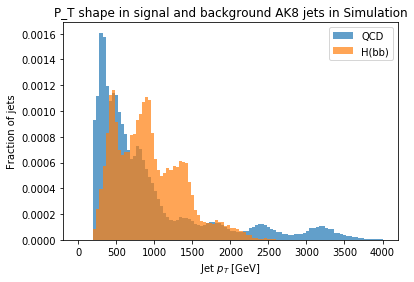

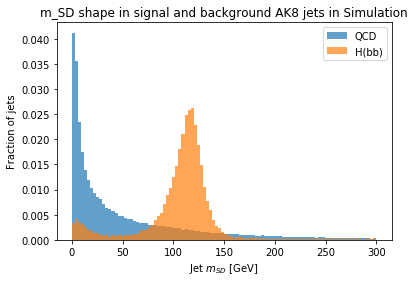

In [8]:
print("We will look at differentiating signal and background at the “jet” level.")
plt.figure()

plt.hist(get_feature('fj_pt'),weights=label_QCD,bins=np.linspace(0,4000,101),density=True,alpha=0.7, label='QCD')
plt.hist(get_feature('fj_pt'),weights=label_Hbb,bins=np.linspace(0,4000,101),density=True,alpha=0.7,label='H(bb)')

plt.xlabel(r'Jet $p_{T}$ [GeV]')
plt.ylabel('Fraction of jets')
plt.legend()
plt.title("P_T shape in signal and background AK8 jets in Simulation")

plt.figure()

plt.hist(get_feature('fj_sdmass'),weights=label_QCD,bins=np.linspace(0,300,101),density=True,alpha=0.7, label='QCD')
plt.hist(get_feature('fj_sdmass'),weights=label_Hbb,bins=np.linspace(0,300,101),density=True,alpha=0.7,label='H(bb)')
plt.xlabel(r'Jet $m_{SD}$ [GeV]')
plt.ylabel('Fraction of jets')
plt.legend()
plt.title("m_SD shape in signal and background AK8 jets in Simulation")
plt.show()



## 1.2 Jagged arrays

We plot the full distibution of track pts in blue.

And we find the highest track pt per jet and plot only that in orange.

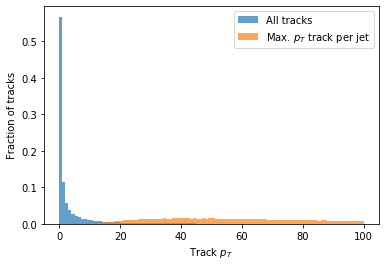

In [9]:
plt.figure()
plt.hist(get_feature('track_pt').flatten(),bins=np.linspace(0,100,101),density=True,alpha=0.7,label='All tracks')
plt.hist(get_feature('track_pt').max(axis=1),bins=np.linspace(0,100,101),density=True,alpha=0.7,label=r'Max. $p_{T}$ track per jet')

plt.xlabel(r'Track $p_{T}$')
plt.ylabel('Fraction of tracks')
plt.legend()
plt.show()

## 1.3 Visualize separation of track features
We visualize the separation by plotting the signal and background for several track features that may be important.


- Maximum relative track p_T

- Maximum signed 3D impact parameter value

- Maximum signed 3D impact parameter significance: this is the value above divded by the estimated uncertainty of the measurement. This enables us to tell how “significant” (far from impact parameter of 0), this value is.

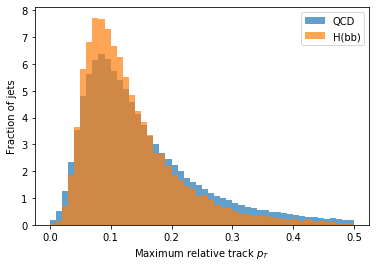

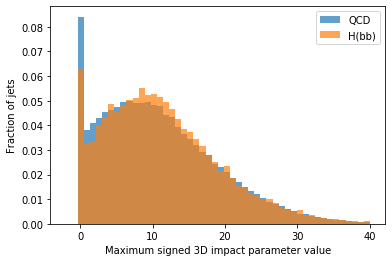

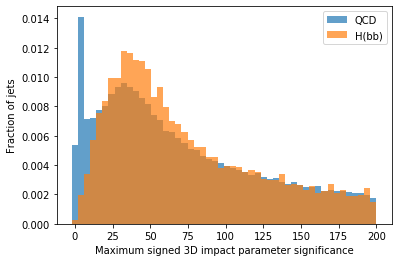

In [10]:
# max. relative track pt: track_pt / 
plt.figure()
plt.hist(get_feature('track_pt').max(axis=1)/get_feature('fj_pt'),weights=label_QCD,bins=np.linspace(0,0.5,51),density=True,alpha=0.7,label='QCD')
plt.hist(get_feature('track_pt').max(axis=1)/get_feature('fj_pt'),weights=label_Hbb,bins=np.linspace(0,0.5,51),density=True,alpha=0.7,label='H(bb)')
plt.xlabel(r'Maximum relative track $p_{T}$')
plt.ylabel('Fraction of jets')
plt.legend()

# maximum signed 3D impact paramter value
plt.figure()
plt.hist(get_feature('trackBTag_Sip3dVal').max(axis=1),weights=label_QCD,bins=np.linspace(-2,40,51),density=True,alpha=0.7,label='QCD')
plt.hist(get_feature('trackBTag_Sip3dVal').max(axis=1),weights=label_Hbb,bins=np.linspace(-2,40,51),density=True,alpha=0.7,label='H(bb)')
plt.xlabel('Maximum signed 3D impact parameter value')
plt.ylabel('Fraction of jets')
plt.legend()

# maximum signed 3D impact paramter significance
plt.figure()
plt.hist(get_feature('trackBTag_Sip3dSig').max(axis=1),weights=label_QCD,bins=np.linspace(-2,200,51),density=True,alpha=0.7,label='QCD')
plt.hist(get_feature('trackBTag_Sip3dSig').max(axis=1),weights=label_Hbb,bins=np.linspace(-2,200,51),density=True,alpha=0.7,label='H(bb)')
plt.xlabel('Maximum signed 3D impact parameter significance')
plt.ylabel('Fraction of jets')
plt.legend()

plt.show()

## 1.4 Correlation Heatmaps

In this section, we analyze the correlation of some features. We use a correlation heatmaps to visualize the correlation matrix. Through the heatmap, we are able to find the most and least correlated variables and discriminating variables.

In [11]:
# selected features useful for the classification task.
features = ['fj_jetNTracks', # Number of tracks associated with the AK8 jet
            'fj_nSV',  # Number of SVs associated with the AK8 jet (∆R < 0.7)
            'fj_tau0_trackEtaRel_0',# Smallest track pseudorapidity ∆η, relative to the jet axis, associated to the 1st N-subjettiness axis
            'fj_tau0_trackEtaRel_1', # Second smallest ...
            'fj_tau0_trackEtaRel_2', # Third smallest ...
            'fj_tau1_trackEtaRel_0', # Smallest track pseudorapidity ∆η, relative to the jet axis, associated to the 2nd N-subjettiness axis
            'fj_tau1_trackEtaRel_1', # Second smallest ...
            'fj_tau1_trackEtaRel_2', # Thrid smallest ...
            'fj_tau_flightDistance2dSig_0', # Transverse (2D) flight distance significance between the PV and the SV with the smallest uncertainty on the 3D flight distance associated to the first N-subjettiness axis
            'fj_tau_flightDistance2dSig_1', # ... associated to the second N-subjettiness axis
            'fj_tau_vertexDeltaR_0',  # Pseudoangular distance ∆R between the first N-subjettiness axis and SV direction
            'fj_tau_vertexEnergyRatio_0', # SV vertex energy ratio for the first N-subjettiness axis, defined as the total energy of all SVs associated with the first N-subjettiness axis divided by the total energy of all the tracks associated with the AK8 jet that are consistent with the PV
            'fj_tau_vertexEnergyRatio_1', # SV vertex energy ratio for the second N-subjettiness axis
            'fj_tau_vertexMass_0', 
            'fj_tau_vertexMass_1',
            'fj_trackSip2dSigAboveBottom_0',
            'fj_trackSip2dSigAboveBottom_1',
            'fj_trackSip2dSigAboveCharm_0',
            'fj_trackSipdSig_0',
            'fj_trackSipdSig_0_0',
            'fj_trackSipdSig_0_1',
            'fj_trackSipdSig_1',
            'fj_trackSipdSig_1_0',
            'fj_trackSipdSig_1_1',
            'fj_trackSipdSig_2',
            'fj_trackSipdSig_3',
            'fj_z_ratio']
df_dict = {}  # prepare dictionary for the dataframe
for key in features:
    if key[:2] == 'fj':
        df_dict[key] = get_feature(key)

df = pd.DataFrame(df_dict) # build dataframe from the dictionary

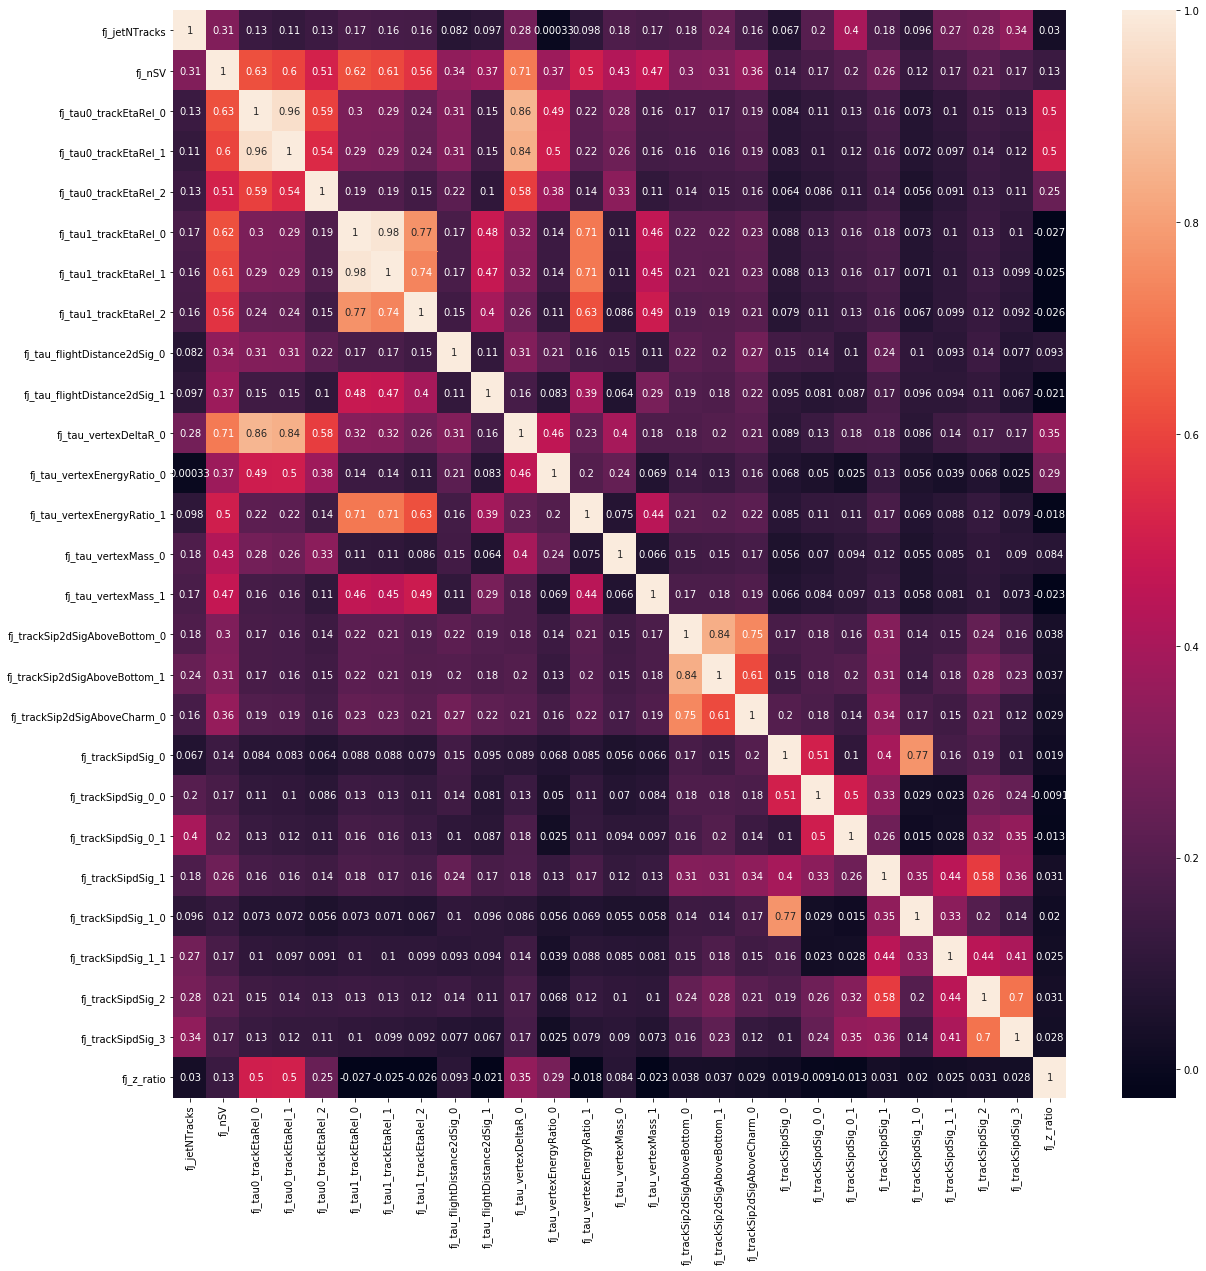

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True);
plt.show()